# Prime Numbers

In [1]:
# Numerical arrays.
import numpy as np

# Plots.
import matplotlib.pyplot as plt

## Why We Like Primes

> Every integer greater than 1 can be represented uniquely as a product of prime numbers.  
>   
> e.g $1200 = 2^4 3^1 5^2$  
>  
> https://en.wikipedia.org/wiki/Fundamental_theorem_of_arithmetic  

In [2]:
2**4 * 3**1 * 5**2

1200

## Testing for Primes

> The algorithm was the first one which is able to determine in polynomial time, whether a given number is prime or composite without relying on mathematical conjectures such as the generalized Riemann hypothesis.
>  
> https://en.wikipedia.org/wiki/AKS_primality_test

In [3]:
# Brute force test for primality.
def isprime(n):
    """Test whether n is prime."""
    # Loop through 2...n-1.
    for i in range(2, n):
        # Calculate remainder of n divided by i.
        if n % i == 0:
            # If this is zero, then n is not prime.
            return False
    # If we get here, then n is prime.
    return True

In [4]:
# Non-prime.
isprime(10)

False

In [5]:
# Non-prime.
isprime(17*19)

False

In [6]:
# A prime
isprime(97)

True

## A Slight Improvement

For a product of two numbers, a small factor is balanced by a large factor.  
The balance point is the square root.  
We can use our numpy and matplotlib skills to visualize this.  

In [7]:
# Consider this product of two primes - note that it is not prime.
n = 17*19

In [8]:
# The square root of n.
np.sqrt(n)

np.float64(17.97220075561143)

Let's plot x versus n/x around the square root.

In [9]:
# Let one of the factors be x.
x = np.linspace(10.0, 25.0, 100)

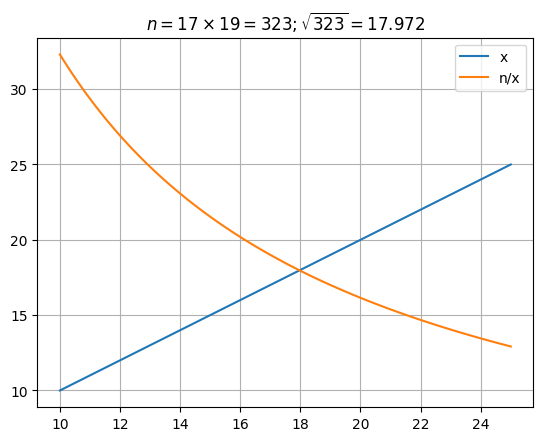

In [10]:
# Create a plot.
fig, ax = plt.subplots()

# Plot the division.
ax.plot(x, x, label='x')
ax.plot(x, n/x, label='n/x')

# Add a grid.
ax.grid(True)

# Add title.
ax.set_title(r'$n = 17 \times 19 = 323; \sqrt{323} = 17.972$')

# Add a legend.
ax.legend();

In [11]:
# Floor of the square root.
int(np.floor(np.sqrt(n)))

17

## More Efficient Algorithm

In [12]:
# Square root test for primality.
def isprime_sqrt(n):
    """Test whether n is prime."""
    # Loop through 2...floor(sqrt(n)).
    for i in range(2, np.floor(np.sqrt(n)).astype(int) + 1):
        # Calculate remainder of n divided by i.
        if n % i == 0:
            # If this is zero, then n is not prime.
            return False
    # If we get here, then n is prime.
    return True

In [13]:
# Non-prime.
isprime_sqrt(10)

False

In [14]:
# Non-prime.
isprime_sqrt(17*19)

False

In [15]:
# A prime.
isprime_sqrt(97)

True

## Testing Efficiency

In [16]:
%%timeit

isprime(15485863)

782 ms ± 59.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit 

isprime_sqrt(15485863)

188 μs ± 7.78 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Factorization

> A one-way function is a function that is easy to compute on every input, but hard to invert given the image of a random input.  
>   
> https://en.wikipedia.org/wiki/One-way_function  

In [18]:
# Multiplying numbers is quick.
n = 17 * 19

In [19]:
# The complexity relies on the number of digits in the number.
print(f"Number of digits in {n}: {len(str(n))}")

Number of digits in 323: 3


In [20]:
# Try all numbers up to the square root.
for i in range(2, int(np.sqrt(n)) + 1):
    # If it divides, then it is a factor.
    if n % i == 0:
        print(f"{n} = {i} * {n // i}")

323 = 17 * 19


In [21]:
# Note that relies on the number of numbers between 2 and the square root.
print(f"Number of numbers to check: {int(np.sqrt(n)) - 1}")

Number of numbers to check: 16


## Idea

Find two large primes.  
Multiply them together to devise an encryption key.  
Ensure decryption can only be done if you know the factors.  

In [22]:
# The first ten primes by brute force.
def find_primes():
    """Find the first ten primes."""
    # Start with an empty list.
    primes = []
    # Start with 2.
    n = 2
    # Keep going until we have ten primes.
    while len(primes) < 10:
        # If n is prime.
        if isprime(n):
            # Add it to the list.
            primes.append(n)
        # Move to the next number.
        n += 1
    # Return the list.
    return primes

In [23]:
# Run the function.
find_primes()

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

Suggested improvements:

- Use our `primes_sqrt()` function.

- Ignore even numbers (`n += 2`) after `2`.

- Only test the division for primes already found.

## End